In [1]:
import os
import tarfile
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import scipy
import gc

In [2]:
# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252


In [3]:
data_path = './DATA/EMBRYO_CRE_POSITIVE'
adata = sc.read_10x_mtx(
    data_path,
    var_names='gene_symbols',
    cache=True
)

In [4]:
adata

AnnData object with n_obs × n_vars = 725158 × 32286
    var: 'gene_ids', 'feature_types'

In [5]:
adata.obs.head()

""
AAACAGCCAAACAACA-1
AAACAGCCAAACATAG-1
AAACAGCCAAACCCTA-1
AAACAGCCAAACCTAT-1
AAACAGCCAAACCTTG-1


In [6]:
adata.X

<725158x32286 sparse matrix of type '<class 'numpy.float32'>'
	with 17623821 stored elements in Compressed Sparse Column format>

In [7]:
non_zero_elements = adata.X.data[:10] if scipy.sparse.issparse(adata.X) else adata.X[np.nonzero(adata.X)][:10]

print("First 10 non-zero elements of adata.X:")
print(non_zero_elements)

First 10 non-zero elements of adata.X:
[ 1.  1. 16.  1.  1. 12. 21.  1.  3.  2.]


In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [9]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

In [10]:
adata.var.head()

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
Xkr4,ENSMUSG00000051951,Gene Expression,828,False,828,0.140823,0.131750,96.660886,3492.0,8.158516
Gm1992,ENSMUSG00000089699,Gene Expression,60,False,60,0.002944,0.002940,99.758035,73.0,4.304065
Gm19938,ENSMUSG00000102331,Gene Expression,145,False,145,0.007662,0.007633,99.415252,190.0,5.252274
Rp1,ENSMUSG00000025900,Gene Expression,22,False,22,0.001573,0.001572,99.911280,39.0,3.688879
Sox17,ENSMUSG00000025902,Gene Expression,52,False,52,0.004557,0.004547,99.790297,113.0,4.736198


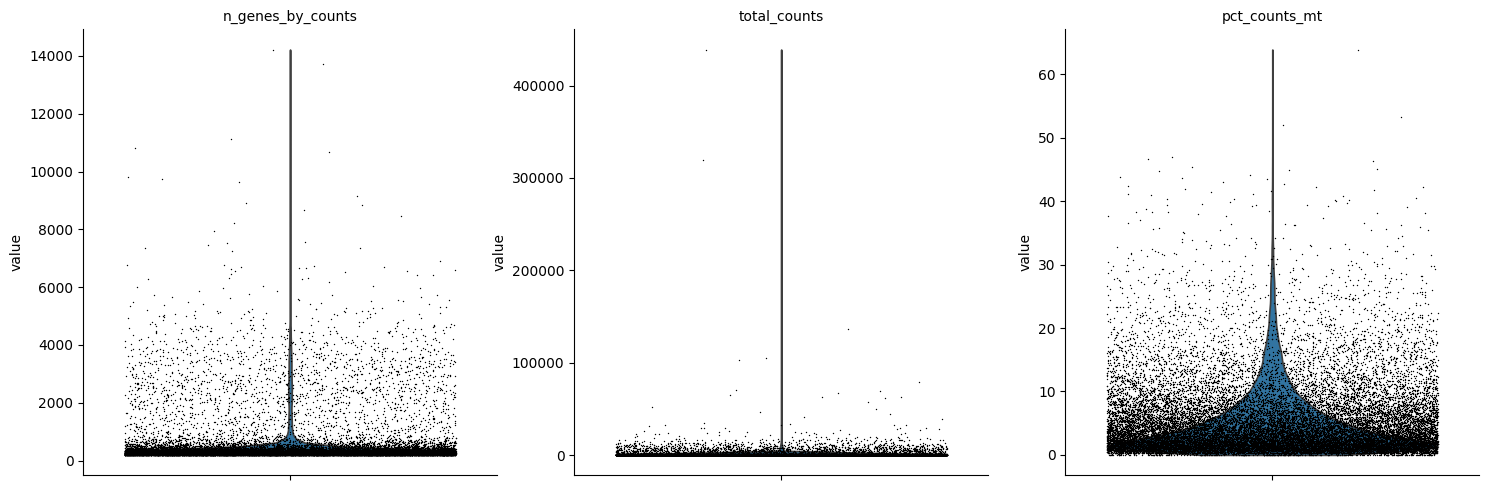

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [12]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.total_counts < 10000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]
gc.collect()

472

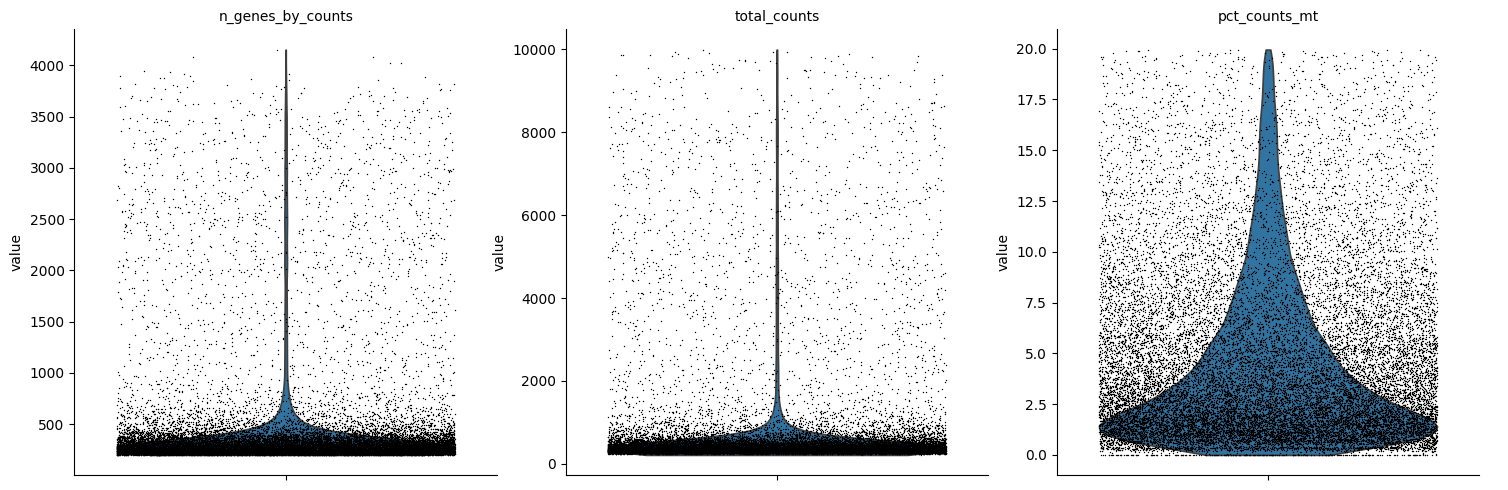

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/kubacki.michal/.conda/envs/jupyter_nb/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [15]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [16]:
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/home/kubacki.michal/.conda/envs/jupyter_nb/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


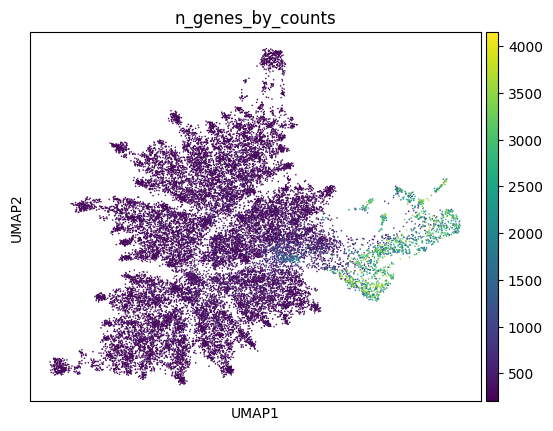

In [17]:
sc.pl.umap(adata, color=['n_genes_by_counts'], wspace=0.4)


In [18]:
adata.write('./output/processed_embryo_cre_positive_data.h5ad')
